# This notebook is a small code to INNER_LAYER_REPRESENTATION.

In [2]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Data

df = pd.read_csv('banknotes.csv')

In [4]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [6]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [8]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [9]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [10]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu')) # we need 2 nodes for deeper model
model.add(Dense(1, activation='sigmoid'))   # and 1 output node
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 1ms/step - loss: 0.6927 - acc: 0.6042 - val_loss: 0.5931 - val_acc: 0.9340
Epoch 2/20
672/672 [==============================] - 0s 97us/step - loss: 0.4720 - acc: 0.9048 - val_loss: 0.4166 - val_acc: 0.9514
Epoch 3/20
672/672 [==============================] - 0s 128us/step - loss: 0.3237 - acc: 0.9464 - val_loss: 0.2892 - val_acc: 0.9688
Epoch 4/20
672/672 [==============================] - 0s 118us/step - loss: 0.2269 - acc: 0.9643 - val_loss: 0.2035 - val_acc: 0.9722
Epoch 5/20
672/672 [==============================] - 0s 116us/step - loss: 0.1648 - acc: 0.9762 - val_loss: 0.1482 - val_acc: 0.9861
Epoch 6/20
672/672 [==============================] - 0s 111us/step - loss: 0.1249 - acc: 0.9777 - val_loss: 0.1120 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 124us/step - loss: 0.0996 - acc: 0.9851 - val_loss: 0.0883 - val_acc: 0.9861
Epoch 8/20
672/672 

In [11]:
# we get accuracy =1 

result

[0.02761848026759995, 0.9902912621359223]

In [12]:
model.summary()

# Layer 1 = 2 outputs and 10 parameters
# Layer 2 = 1 output and 3 parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
inp = model.layers[0].input
out = model.layers[0].output

In [15]:
inp # our model has 4 input layers

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [16]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [17]:
features_function = K.function([inp], [out])

In [18]:
features_function

In [19]:
features_function([X_test])[0].shape

(412, 2)

In [20]:
features = features_function([X_test])[0]

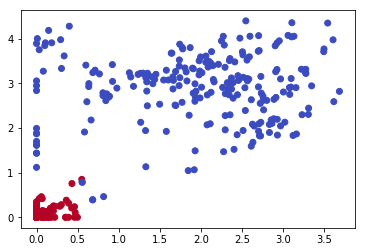

In [21]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [22]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])


412/412 [==============================] - 0s 39us/step


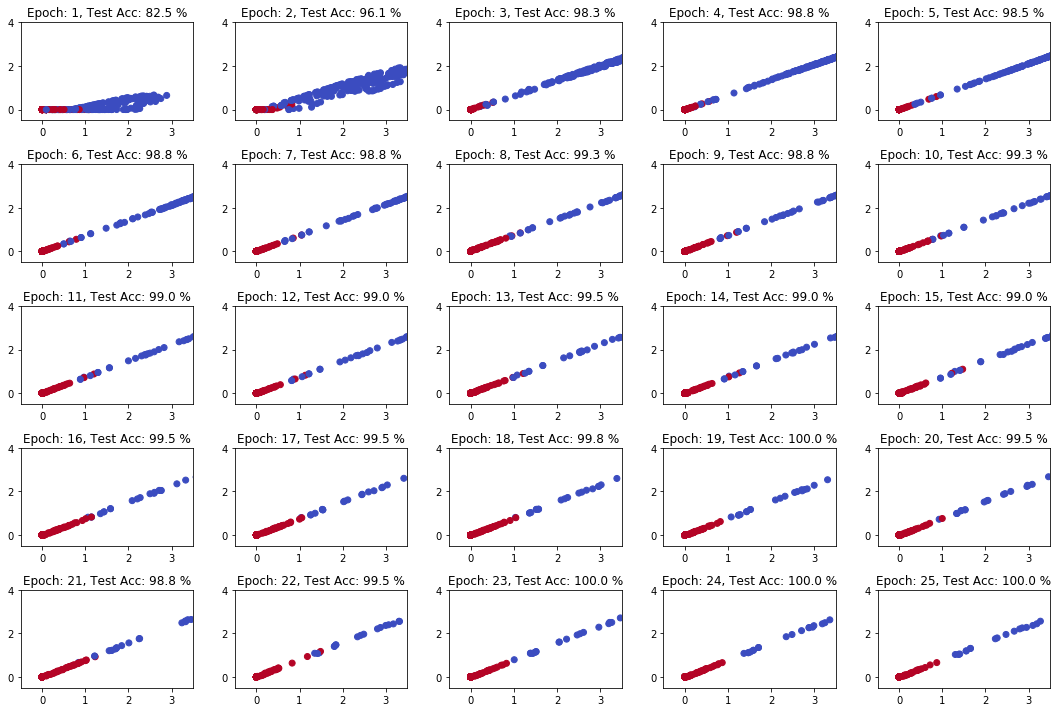

In [23]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

In [24]:
# here the model is learning to separate out diffrent data very well